# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\paulg\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
api_key = "d42da132c423442e904c878a52413e87" #os.getenv("NEWS_API")
#load_dotenv()

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q='bitcoin AND Bitcoin',
                            language='en',
                            page_size=100,
                            sort_by='relevancy')

In [5]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q='ethereum AND Ethereum',
                            language='en',
                            page_size=100,
                            sort_by='relevancy')

In [6]:
#Define function to create dataframes from news api pull
def create_df(news):
    articles = []
    for article in news:
        try:
            text = article['content']
            articles.append({
                'text': text,
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [7]:
# Create dataframes for each topic
btc_df = create_df(btc_news['articles'])
btc_df.dropna(inplace=True)

eth_df = create_df(eth_news['articles'])
eth_df.dropna(inplace=True)

btc_df.head()

,text
0,You won't have to stick to Bitcoin if you're d...
1,Four months after Twitter first introduced in-...
2,Its the countrys latest crackdown on digital c...
3,A recently-installed Bitcoin ATM.\r\n\n \n\n A...
4,The government of El Salvador purchased at lea...


In [8]:
# Create the Bitcoin sentiment scores DataFrame

# Sentiment scores dictionaries
text_sent = {
    'text_compound': [],
    'text_pos': [],
    'text_neu': [],
    'text_neg': [],
}

# Get sentiment for the text and the title
for index, row in btc_df.iterrows():
    try:
        text_sentiment = analyzer.polarity_scores(row['text'])
        text_sent['text_compound'].append(text_sentiment['compound'])
        text_sent['text_pos'].append(text_sentiment['pos'])
        text_sent['text_neu'].append(text_sentiment['neu'])
        text_sent['text_neg'].append(text_sentiment['neg'])
    except AttributeError:
        pass
    
btc_sentiment_df = pd.DataFrame(text_sent)

btc_df = btc_df.join(btc_sentiment_df)

btc_df.columns = ['Article','Compound','Positive','Neutral','Negative']

btc_df.head()

,Article,Compound,Positive,Neutral,Negative
0,You won't have to stick to Bitcoin if you're d...,0.5574,0.127,0.838,0.036
1,Four months after Twitter first introduced in-...,0.0000,0.000,1.000,0.000
2,Its the countrys latest crackdown on digital c...,0.0000,0.000,1.000,0.000
3,A recently-installed Bitcoin ATM.\r\n\n \n\n A...,0.1779,0.052,0.948,0.000
4,The government of El Salvador purchased at lea...,0.1280,0.046,0.954,0.000


In [9]:
# Create the Ethereum sentiment scores DataFrame

# Sentiment scores dictionaries
text_sent = {
    'text_compound': [],
    'text_pos': [],
    'text_neu': [],
    'text_neg': [],
}

# Get sentiment for the text and the title
for index, row in eth_df.iterrows():
    try:
        text_sentiment = analyzer.polarity_scores(row['text'])
        text_sent['text_compound'].append(text_sentiment['compound'])
        text_sent['text_pos'].append(text_sentiment['pos'])
        text_sent['text_neu'].append(text_sentiment['neu'])
        text_sent['text_neg'].append(text_sentiment['neg'])
    except AttributeError:
        pass
    
eth_sentiment_df = pd.DataFrame(text_sent)

eth_df = eth_df.join(eth_sentiment_df)

eth_df.columns = ['Article','Compound','Positive','Neutral','Negative']

eth_df.head()

,Article,Compound,Positive,Neutral,Negative
0,Its the countrys latest crackdown on digital c...,0.0000,0.000,1.000,0.000
1,As the broader crypto world enjoys a late summ...,0.7351,0.167,0.833,0.000
2,You won't have to stick to Bitcoin if you're d...,0.5574,0.127,0.838,0.036
3,OpenSea isn't wasting much time after its head...,0.2865,0.180,0.694,0.126
4,Robinhood plans to start a cryptocurrency wall...,0.4588,0.108,0.892,0.000


In [10]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Positive,Neutral,Negative
count,100.000000,100.000000,100.000000,100.000000
mean,0.092659,0.057760,0.910510,0.031720
std,0.338825,0.057786,0.075776,0.049094
min,-0.757900,0.000000,0.708000,0.000000
25%,0.000000,0.000000,0.863750,0.000000
50%,0.051600,0.049000,0.925500,0.000000
75%,0.340000,0.094250,0.974500,0.055750
max,0.855500,0.240000,1.000000,0.208000


In [11]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Positive,Neutral,Negative
count,100.000000,100.000000,100.000000,100.000000
mean,0.128007,0.065580,0.902200,0.032230
std,0.384321,0.073638,0.087955,0.054529
min,-0.893400,0.000000,0.688000,0.000000
25%,0.000000,0.000000,0.838000,0.000000
50%,0.000000,0.054500,0.913000,0.000000
75%,0.421500,0.108000,1.000000,0.064000
max,0.941300,0.308000,1.000000,0.312000


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC

Q: Which coin had the highest compound score?

A: BTC

Q. Which coin had the highest positive score?

A: BTC

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'said', 'sent', 'today', 'week', 'also', 'el', 'salvador',}

# Expand the default stopwords list if necessary


In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-z]")
    clean_text = regex.sub('', text)
   
    # Create a tokenized list of the words
    sentence = sent_tokenize(clean_text)
    words = []
    for sent in sentence:
        word = word_tokenize(sent)
        words = words + word
   
    # Convert the words to lowercase
    words_lc = [word.lower() for word in words]
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    words_sw = [word for word in words_lc if word not in sw]
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words_sw]
    
    return tokens

In [15]:
# Create a new tokens column for Bitcoin
btc_df['Tokens'] = [tokenizer(text) for text in btc_df['Article']]
btc_df.head()

,Article,Compound,Positive,Neutral,Negative,Tokens
0,You won't have to stick to Bitcoin if you're d...,0.5574,0.127,0.838,0.036,[youwonthavetosticktobitcoinifyouredeterminedt...
1,Four months after Twitter first introduced in-...,0.0000,0.000,1.000,0.000,[fourmonthsaftertwitterfirstintroducedinapptip...
2,Its the countrys latest crackdown on digital c...,0.0000,0.000,1.000,0.000,[itsthecountryslatestcrackdownondigitalcurrenc...
3,A recently-installed Bitcoin ATM.\r\n\n \n\n A...,0.1779,0.052,0.948,0.000,[arecentlyinstalledbitcoinatmasoftodaybitcoini...
4,The government of El Salvador purchased at lea...,0.1280,0.046,0.954,0.000,[thegovernmentofelsalvadorpurchasedatleastbitc...


In [16]:
# Create a new tokens column for Ethereum
eth_df['Tokens'] = [tokenizer(text) for text in eth_df['Article']]
eth_df.head()

,Article,Compound,Positive,Neutral,Negative,Tokens
0,Its the countrys latest crackdown on digital c...,0.0000,0.000,1.000,0.000,[itsthecountryslatestcrackdownondigitalcurrenc...
1,As the broader crypto world enjoys a late summ...,0.7351,0.167,0.833,0.000,[asthebroadercryptoworldenjoysalatesummersurge...
2,You won't have to stick to Bitcoin if you're d...,0.5574,0.127,0.838,0.036,[youwonthavetosticktobitcoinifyouredeterminedt...
3,OpenSea isn't wasting much time after its head...,0.2865,0.180,0.694,0.126,[openseaisntwastingmuchtimeafteritsheadofprodu...
4,Robinhood plans to start a cryptocurrency wall...,0.4588,0.108,0.892,0.000,[robinhoodplanstostartacryptocurrencywalletnex...


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
big_string = ' '.join(btc_df['Article'])
processed = tokenizer(big_string)
bigrams = ngrams(processed, n=2)
Counter(bigrams).most_common(10)

[(('[', 'char'), 96),
 (('char', ']'), 96),
 (('youwonthavetosticktobitcoinifyouredeterminedtopayforyourmovieticketwithcryptocurrencyamcchiefadamaronhasrevealedhistheaterchainwillalsoacceptethereumlitecoinandbi',
   '['),
  1),
 ((']',
   'fourmonthsaftertwitterfirstintroducedinapptippingthecompanyisexpandingitstipjarfeatureinamajorwaythecompanyisopeninguptippingtoallitsusersgloballyandforthefirst'),
  1),
 (('fourmonthsaftertwitterfirstintroducedinapptippingthecompanyisexpandingitstipjarfeatureinamajorwaythecompanyisopeninguptippingtoallitsusersgloballyandforthefirst',
   '['),
  1),
 ((']',
   'itsthecountryslatestcrackdownondigitalcurrenciesillustrationbyalexcastrothevergethepeoplesbankofchinathecountryscentralbanksaidfridaythatcryptocurrencytransactionsar'),
  1),
 (('itsthecountryslatestcrackdownondigitalcurrenciesillustrationbyalexcastrothevergethepeoplesbankofchinathecountryscentralbanksaidfridaythatcryptocurrencytransactionsar',
   '['),
  1),
 ((']',
   'arecentlyinstalledbitc

In [19]:
# Generate the Ethereum N-grams where N=2
big_string = ' '.join(eth_df['Article'])
processed = tokenizer(big_string)
bigrams = ngrams(processed, n=2)
Counter(bigrams).most_common(10)

[(('[', 'char'), 100),
 (('char', ']'), 100),
 ((']',
   'personalfinanceinsiderwritesaboutproductsstrategiesandtipstohelpyoumakesmartdecisionswithyourmoneywemayreceiveasmallcommissionfromourpartnerslikeamericanexpressbut'),
  3),
 (('personalfinanceinsiderwritesaboutproductsstrategiesandtipstohelpyoumakesmartdecisionswithyourmoneywemayreceiveasmallcommissionfromourpartnerslikeamericanexpressbut',
   '['),
  3),
 ((']',
   'augreutersthefirstcryptocurrencyatminhondurasopenedthisweekasbitcoinbackerssoughttospurdemandforvirtualassetsafterneighboringelsalvadorbecamethefirstcountrytoesta'),
  2),
 (('augreutersthefirstcryptocurrencyatminhondurasopenedthisweekasbitcoinbackerssoughttospurdemandforvirtualassetsafterneighboringelsalvadorbecamethefirstcountrytoesta',
   '['),
  2),
 (('itsthecountryslatestcrackdownondigitalcurrenciesillustrationbyalexcastrothevergethepeoplesbankofchinathecountryscentralbanksaidfridaythatcryptocurrencytransactionsar',
   '['),
  1),
 ((']',
   'asthebroadercrypt

In [20]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Use token_count to get the top 10 words for Bitcoin
big_string = ' '.join(btc_df["Article"])
processed = tokenizer(big_string)
token_count(processed)

[('[', 97), (']', 97), ('char', 96)]

In [22]:
# Use token_count to get the top 10 words for Ethereum
big_string = ' '.join(eth_df['Article'])
processed = tokenizer(big_string)
token_count(processed)

[('[', 101), (']', 101), ('char', 100)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

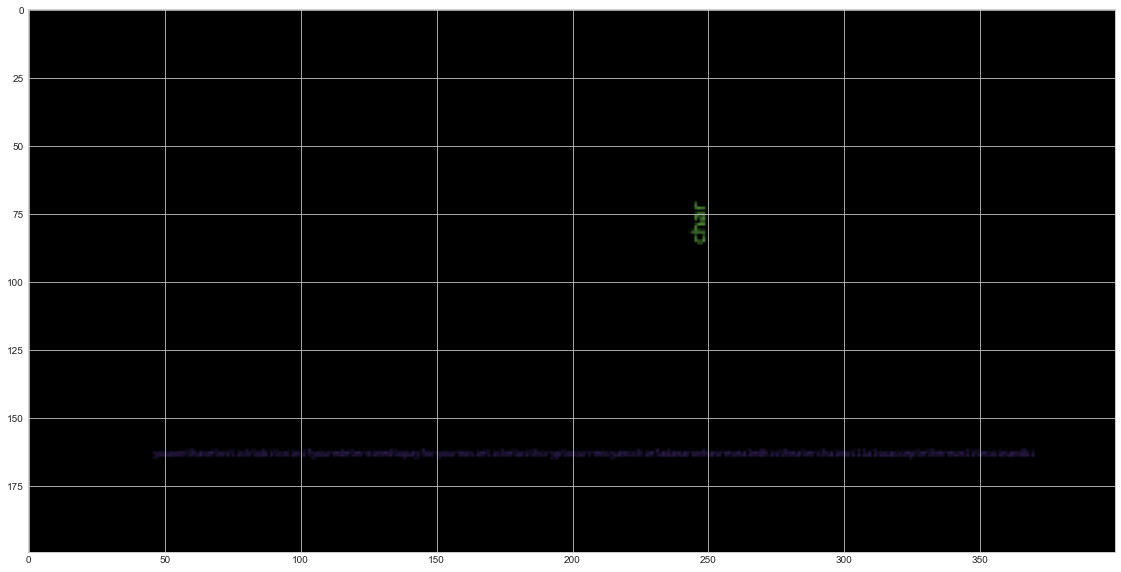

In [24]:
# Generate the Bitcoin word cloud
big_string = ' '.join(btc_df['Article'])
processed = tokenizer(big_string)
input_text = ' '.join(processed)
wc = WordCloud().generate(input_text)
plt.imshow(wc)

In [ ]:
# Generate the Ethereum word cloud
big_string = ' '.join(eth_df['Article'])
processed = tokenizer(big_string)
input_text = ' '.join(processed)
wc = WordCloud().generate(input_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [ ]:
!pip install spacy
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [ ]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [ ]:
# Concatenate all of the Bitcoin text together
btc_text = ' '.join(btc_df['Article'])
btc_text

In [ ]:
# Run the NER processor on all of the text
doc = nlp(btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [ ]:
# Render the visualization
displacy.render(doc, style='ent')

In [ ]:
# List all Entities
for ent in doc.ents:
    print (ent.text, ent.label_)

---

### Ethereum NER

In [ ]:
# Concatenate all of the Ethereum text together
eth_text = ' '.join(eth_df['Article'])
eth_text

In [ ]:
# Run the NER processor on all of the text
doc = nlp(eth_text)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [ ]:
# Render the visualization
displacy.render(doc, style='ent')

In [ ]:
# List all Entities
for ent in doc.ents:
    print (ent.text, ent.label_)

---